----

# <center> <b> <font color = 'orange'>🤖 EXTRAÇÃO DE PATCHES 🤖<center> <b> </font>

----


Foram extraídos 50 patches aleatórios de tamanho 256 x 256 pixels, totalizando:

  *  2.237 imagens de treino -> 111850 patches;
  *  566 imagens de teste -> 28300 patches

- **Conectando com Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1 - Carregar bibliotecas**

In [ ]:
from os import listdir
from os.path import isfile, join
import random
from numpy import arange
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
#-----------------------------------------------------------------------------#
# Parâmetros para extração de patches
#-----------------------------------------------------------------------------#

PATCHES = 50 # Número de patches por imagem
PATCHSIZE = 256 # Tamanho dos patches (256x256 pixels)
SCALE_PERCENT = 20 # Porcentagem de escala da imagem original

#PATHSRC = './Amazon_Bark_Split/train'                                            # Diretório com as  de treino
#PATHSRC = './Amazon_Bark_Split/test'                                             # Diretório com as  de teste

# pega todos os arquivos do diretório
onlyfiles = [ f for f in listdir(PATHSRC) if isfile(join(PATHSRC,f)) ]

In [ ]:
#-----------------------------------------------------------------------------#
# Função para extração de patches
#-----------------------------------------------------------------------------#

def createPatches(fname, patches, patchsize, scale_percent):
  imgs = []
  labels = []

  cname = PATHSRC + '/' + fname
  #print(fname)

  img = cv2.imread(cname);

  ## resize
  w = int(img.shape[1] * scale_percent / 100)
  h = int(img.shape[0] * scale_percent / 100)
  resized_image = cv2.resize(img, (w, h))

  for i in range(patches):
    x = random.randrange(0, w-patchsize)
    y = random.randrange(0, h-patchsize)

    new_img = resized_image[y:y+patchsize, x:x+patchsize] # Crop from x, y, w, h

    nfname = ("%d_%s" % (i, fname))

    imgs.append(new_img)
    labels.append((nfname))

  return np.array(imgs), np.array(labels)

In [ ]:
#-----------------------------------------------------------------------------#
# Extração de patches
#-----------------------------------------------------------------------------#

patches_all = []
labels_all = []

# Iterar sobre as imagens
for fname in onlyfiles:
  print(fname)
  patches, labels = createPatches(fname, PATCHES, PATCHSIZE, SCALE_PERCENT)
  patches_all.extend(patches)
  labels_all.extend(labels)

img_patches = np.array(patches_all)
#print(img_patches)
img_labels = np.array(labels_all)
#print(img_labels)

if not os.path.exists(PATHDST):
  os.makedirs(PATHDST)
  print("Folder %s created!" % PATHDST)
else:
  print("Folder %s already exists" % PATHDST)

Set = os.path.split(PATHSRC)[-1]

# Salvando como npy
# np.save(f'{PATHDST}/patches_{Set}.npy', img_patches)
# np.save(f'{PATHDST}/labels_{Set}.npy', img_labels)

# Salvando como npz
np.savez(f'{PATHDST}/patches_and_labels_{Set}.npz', patches=img_patches, labels=img_labels)

print(f"Total de patches: {len(img_patches)}")
print(f"Total de labels: {len(img_labels)}")

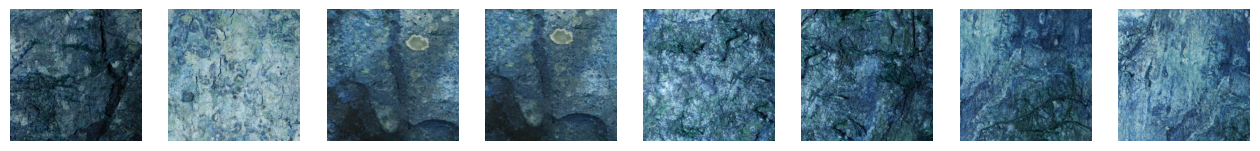

In [ ]:
#Visualizando alguns patches
plt.rcParams['figure.figsize'] = (16, 16)

for i in range(len(img_patches)):
  plt.subplot(1, 8, i + 1)
  plt.imshow(img_patches[i])
  plt.axis('off')

plt.show()
